##Import Libraries

In [1]:
import torch
!pip install torchsummary
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import sys
import torch.nn as nn
import os

##Mount Google Drive to get files

In [2]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [3]:
!rm -rf '/content/drive/My Drive/colab_notebooks/S9/__pycache__'
!ls -lrt '/content/drive/My Drive/colab_notebooks/S9/'

total 20
-rw------- 1 root root  594 Feb  6 09:42 visualise_loss_acc.py
-rw------- 1 root root 1644 Feb  6 09:42 train_test_loader.py
-rw------- 1 root root 1512 Feb  6 09:42 training.py
-rw------- 1 root root 1332 Feb  6 09:42 testing.py
-rw------- 1 root root 4085 Feb  6 09:42 resnet18.py
-rw------- 1 root root 6767 Feb  6 09:42 gradcam.py
-rw------- 1 root root 1475 Feb  6 09:42 get_images.py
-rw------- 1 root root  722 Feb  6 09:42 albumentation_transforms.py


##Add Google Drive path to system path

In [4]:
os.chdir('./drive/My Drive/colab_notebooks/S9/')

!ls

albumentation_transforms.py  gradcam.py   testing.py   train_test_loader.py
get_images.py		     resnet18.py  training.py  visualise_loss_acc.py


##Import python files

In [5]:
import train_test_loader as ttl
import resnet18 as bm
import training as trn
import testing as tst
import visualise_loss_acc as vis
import gradcam as gc
import get_images as gc_img

##Main Function

In [6]:
def main(classes):

  train_loader, test_loader,test_transform = ttl.get_train_test(classes)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  print(device)

  model = bm.ResNet18(dropout=0.1).to(device)
  summary(model, input_size=(3, 32, 32))

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  scheduler = StepLR(optimizer, step_size=35, gamma=0.1)
  EPOCHS=25
 
  test_loss=[]
  test_accuracy=[]
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch + 1)
      train_losses,train_acc=trn.train(model, device, train_loader, optimizer,EPOCHS,criterion,l1=1e-6,l2=1e-3)
      scheduler.step()
      test_losses,test_acc=tst.test(model, device, test_loader,criterion)

      test_loss.append(test_losses)
      test_accuracy.append(test_acc)
  
  vis.plot_acc_loss(test_loss,test_accuracy)
  
  ##gradcam##

  misclass, correct=gc_img.get_images(model,device, test_loader,batch_size=128,num_imgs=2)
  target_layers = ["layer1","layer2","layer3","layer4"]
  viz_cam = gc.VisualizeCam(model,classes, target_layers)

  num_img = len(misclass)

  incorrect_pred_imgs = []
  inc_image_for_gradcam = []
  for i in range(num_img):
    incorrect_pred_imgs.append(torch.as_tensor(misclass[i][0]))
    inc_image_for_gradcam.append(misclass[i])

  print('\n--GRADCAM FOR MISCLASSIFIED IMAGES--')
  viz_cam(torch.stack(incorrect_pred_imgs), inc_image_for_gradcam, target_layers, metric="incorrect")

##Calling Main

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
cuda


  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Loss=1.663988709449768 Batch_id=390 Accuracy=47.07: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 5287/10000 (52.87%)

EPOCH: 2


Loss=1.4484295845031738 Batch_id=390 Accuracy=64.11: 100%|██████████| 391/391 [01:04<00:00,  6.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7277/10000 (72.77%)

EPOCH: 3


Loss=1.3931761980056763 Batch_id=390 Accuracy=71.56: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7096/10000 (70.96%)

EPOCH: 4


Loss=1.1350916624069214 Batch_id=390 Accuracy=76.04: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7594/10000 (75.94%)

EPOCH: 5


Loss=1.2663285732269287 Batch_id=390 Accuracy=78.86: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7904/10000 (79.04%)

EPOCH: 6


Loss=1.2000595331192017 Batch_id=390 Accuracy=81.15: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7847/10000 (78.47%)

EPOCH: 7


Loss=1.240534782409668 Batch_id=390 Accuracy=82.71: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8285/10000 (82.85%)

EPOCH: 8


Loss=0.9838844537734985 Batch_id=390 Accuracy=84.18: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8429/10000 (84.29%)

EPOCH: 9


Loss=0.9761612415313721 Batch_id=390 Accuracy=85.65: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8136/10000 (81.36%)

EPOCH: 10


Loss=0.8887882232666016 Batch_id=390 Accuracy=86.52: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8290/10000 (82.90%)

EPOCH: 11


Loss=0.9742555618286133 Batch_id=390 Accuracy=87.03: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8500/10000 (85.00%)

EPOCH: 12


Loss=0.8226186037063599 Batch_id=390 Accuracy=88.01: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8610/10000 (86.10%)

EPOCH: 13


Loss=0.9530460834503174 Batch_id=390 Accuracy=88.70: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8550/10000 (85.50%)

EPOCH: 14


Loss=0.9849157333374023 Batch_id=390 Accuracy=89.40: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8575/10000 (85.75%)

EPOCH: 15


Loss=0.8077260255813599 Batch_id=390 Accuracy=90.10: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8740/10000 (87.40%)

EPOCH: 16


Loss=0.8289871215820312 Batch_id=390 Accuracy=90.71: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8719/10000 (87.19%)

EPOCH: 17


Loss=0.7855087518692017 Batch_id=390 Accuracy=91.11: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8604/10000 (86.04%)

EPOCH: 18


Loss=0.8493417501449585 Batch_id=390 Accuracy=91.26: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8619/10000 (86.19%)

EPOCH: 19


Loss=0.7572582960128784 Batch_id=390 Accuracy=91.75: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8785/10000 (87.85%)

EPOCH: 20


Loss=0.6997126936912537 Batch_id=390 Accuracy=91.99: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8610/10000 (86.10%)

EPOCH: 21


Loss=0.7535192966461182 Batch_id=390 Accuracy=92.88: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8665/10000 (86.65%)

EPOCH: 22


Loss=0.9380735158920288 Batch_id=390 Accuracy=92.69: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8734/10000 (87.34%)

EPOCH: 23


Loss=0.6681238412857056 Batch_id=390 Accuracy=93.16: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8677/10000 (86.77%)

EPOCH: 24


Loss=0.8933171629905701 Batch_id=390 Accuracy=93.52: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8751/10000 (87.51%)

EPOCH: 25


Loss=0.8602403998374939 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]



Test set: Average loss: 0.0035, Accuracy: 8717/10000 (87.17%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



--GRADCAM FOR MISCLASSIFIED IMAGES--


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


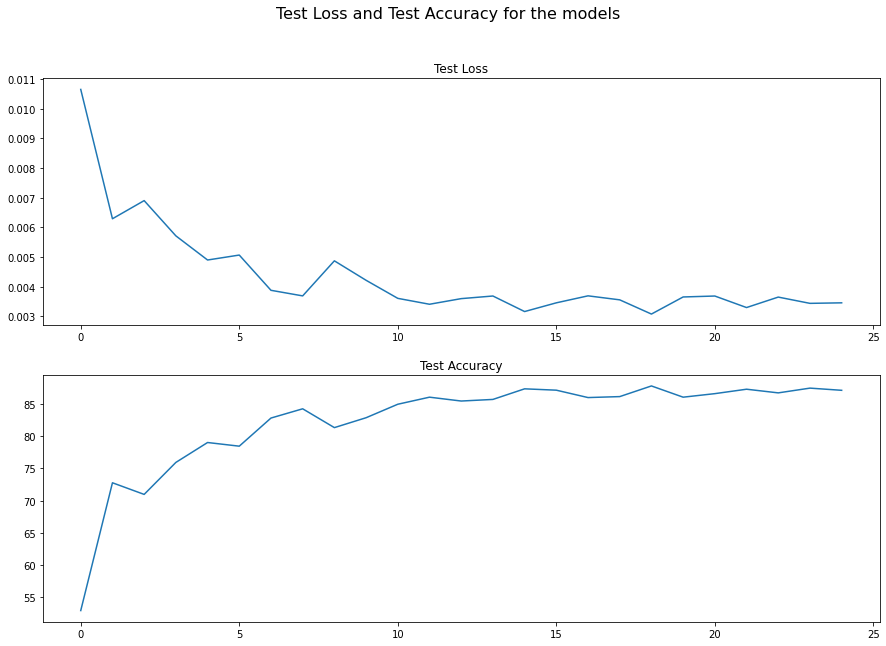

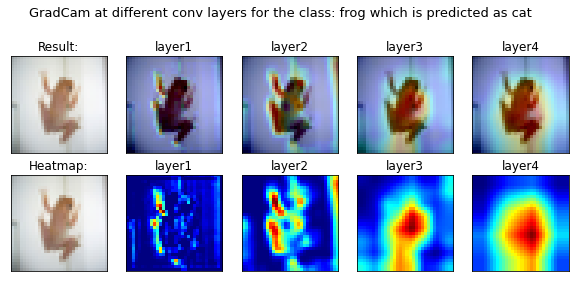

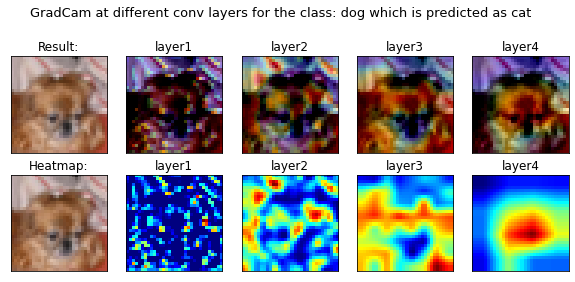

In [7]:
if __name__ == '__main__':
  from tqdm import tqdm
  if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()

  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')
  
  main(classes)